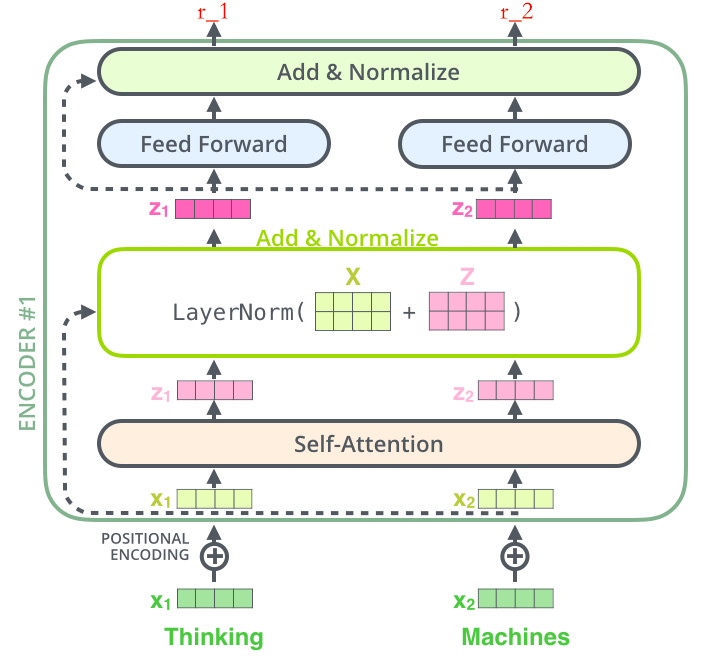

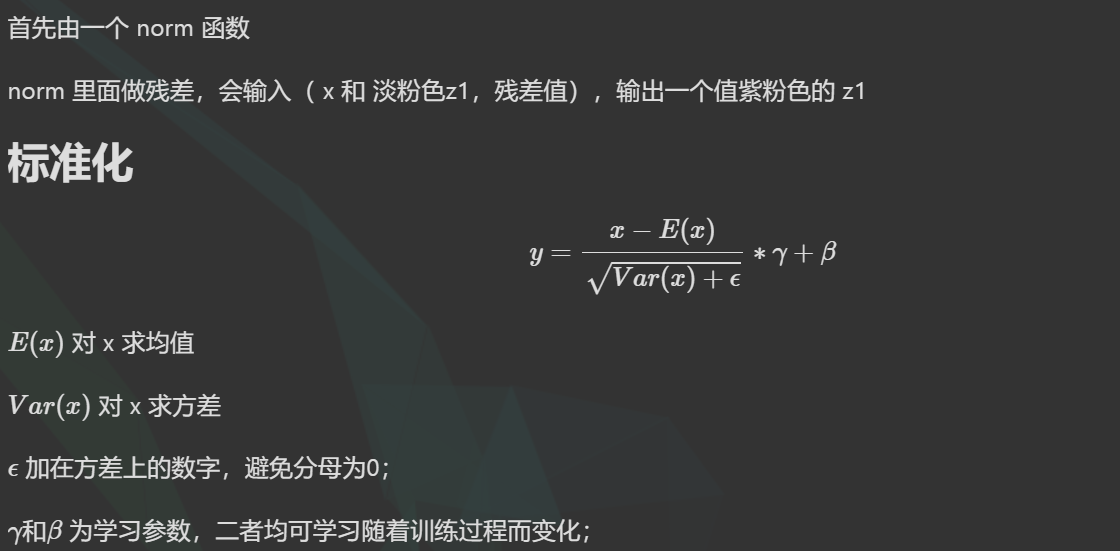

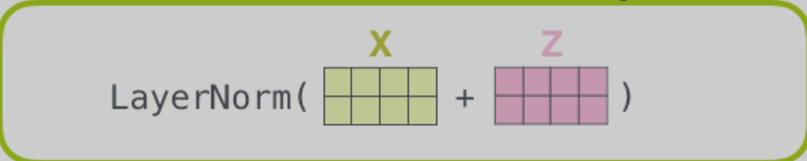

In [2]:
import torch
from torch import nn
import math
import torch.nn.functional as F

In [3]:
class LayerNorm(nn.Module):
    def __init__(self, feature, eps = 1e-6):
        """
        :param feature: self-attention 的 x 的大小
        :param eps:
        """
        super(LayerNorm, self).__init__()
        self.a_2 = nn.Parameter(torch.ones(feature))
        self.b_2 = nn.Parameter(torch.zeros(feature))
        self.eps = eps
        
    def forward(self, x):
        # keepdim=True 的作用是在进行操作（如求均值或标准差）后，保持输入张量的维度结构不变   mean std 会改变维度
        mean = x.mean(-1, keepdim = True)
        std = x.std(-1, keepdim = True)
        return self.a_2 * (x - mean) / (std + self.eps) + self.b_2

In [ ]:
class SublayerConnection(nn.Module):
    def __init__(self, size, dropout = 0.1):
         super(SublayerConnection, self).__init__()
         self.layernorm = LayerNorm(size)
         self.dropout = nn.Dropout(p = dropout)
    
    def forward(self, x, sublayer):
        """
        eg:
        :param x: 就是self-attention的输入  x 是残差
        :param sublayer: self-attention层
        :return:
        """
        return self.dropout(self.layernorm(x + sublayer(x)))